# Assignment 2

## 2.1

Take a look at the [Linnerud dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_linnerud.html#sklearn.datasets.load_linnerud) in Scikit-learn. This dataset has multiple [targets](https://scikit-learn.org/stable/datasets/toy_dataset.html#linnerrud-dataset): 'It consists of three exercise (data) and three physiological (target) variables collected from twenty middle-aged men in a fitness club'.

In your own words, describe how to create a Regression model that would plot the relationship between the waistline and how many situps are accomplished. Do the same for the other datapoints in this dataset.

In [268]:
import sklearn
from  sklearn import datasets, linear_model, model_selection, __version__
X, y = datasets.load_linnerud(return_X_y=True)

The two targets needed would be the size of waistline as X and situps accomplised as y. The Linnerud documentation reveals that these data are placed in the 2nd column. 

The data from the 2nd column from both X and y need to isolated into a new array with the numpy package

In [269]:
import numpy as np
X_1 = X[:, np.newaxis, 1]
y_1 = y[:, np.newaxis, 1]

Now the data need to be split into to piles of data. A good rule of thump is to use 70% of the data for training, whilst leaving 30% to the test the trained model. 

In [270]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_1, y_1, test_size=0.3)

print(X_train.shape)

(14, 1)


From here, the data can be passed to various regression models. 
The regression models are based on the cost function and uses gradient decent to find the lowest cost. With Python, the model.fit() function is commonly used. The function takes the date saved a training data as input. 
The model.predict() function creates a linear regression line based on the data left for testing: X_test. 

In [271]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

From here, the predicted regression, y_pred, can be plotted.

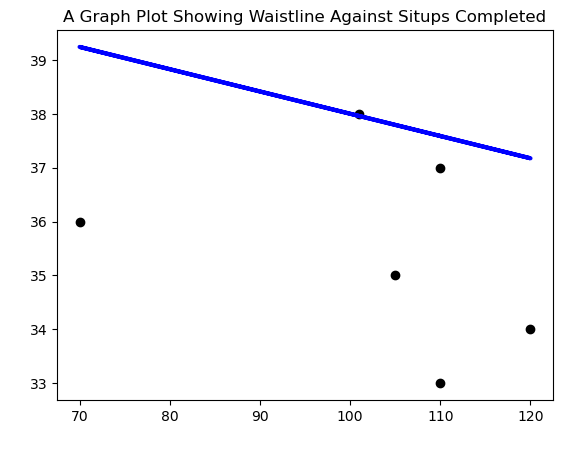

In [272]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('A Graph Plot Showing Waistline Against Situps Completed')
plt.show()

Its possible to determine how well the model predicted the values, with the model.predict() function and using sklearn metrics. 

In [273]:
predictions = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 8.311875066564143
RMSE: 2.88303226942817
R2: -1.8497857371077067


Mean Square Error (MSE): The smaller the better

Root Mean Square Error (RMSE): The smaller the better

Coefficient of Determination (usually known as R-squared or R2): The bigger the better

Trying to reach better values with a polynomial regression

In [274]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [275]:
# setup and train the pipeline
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
pipeline.fit(X_train,y_train)

pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, pred)
print("MSE:", mse)


MSE: 6.384105703950778


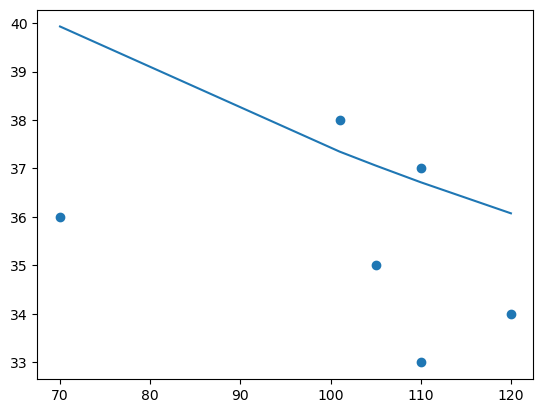

In [276]:
#plotting polynominal regression

plt.scatter(X_test, y_test)
plt.plot(sorted(X_test), pipeline.predict(sorted(X_test)))

## 2.2


In the lesson, you used a subset of the pumpkin data. Now, go back to the original data and try to use all of it, cleaned and standardized, to build a Logistic Regression model in a Jupyter notebook. Evaluate your model by a confusion matrix: remember to calculate and visualize the ROC curve. Aim for a well-explained and well-performing model in your notebook.

In [277]:
# read pumpkin csv file

import pandas as pd
pumpkins = pd.read_csv('data/US-pumpkins.csv')

pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

#recalculating accordingly to package size

pumpkins.loc[pumpkins['Package'].str.contains('1 1/9'), 'High Price'] = pumpkins['High Price']/(1 + 1/9)

pumpkins.loc[pumpkins['Package'].str.contains('1/2'), 'High Price'] = pumpkins['High Price']/(1/2)

pumpkins.info

<bound method DataFrame.info of       City Name Type               Package    Variety Sub Variety  Grade  \
70    BALTIMORE  NaN  1 1/9 bushel cartons   PIE TYPE         NaN    NaN   
71    BALTIMORE  NaN  1 1/9 bushel cartons   PIE TYPE         NaN    NaN   
72    BALTIMORE  NaN  1 1/9 bushel cartons   PIE TYPE         NaN    NaN   
73    BALTIMORE  NaN  1 1/9 bushel cartons   PIE TYPE         NaN    NaN   
74    BALTIMORE  NaN  1 1/9 bushel cartons   PIE TYPE         NaN    NaN   
...         ...  ...                   ...        ...         ...    ...   
1738  ST. LOUIS  NaN    1/2 bushel cartons  MINIATURE   FLAT TYPE    NaN   
1739  ST. LOUIS  NaN    1/2 bushel cartons  MINIATURE   FLAT TYPE    NaN   
1740  ST. LOUIS  NaN    1/2 bushel cartons  MINIATURE   FLAT TYPE    NaN   
1741  ST. LOUIS  NaN    1/2 bushel cartons  MINIATURE   FLAT TYPE    NaN   
1742  ST. LOUIS  NaN    1/2 bushel cartons  MINIATURE   FLAT TYPE    NaN   

         Date  Low Price  High Price  Mostly Low  ...  

In [278]:
from sklearn.preprocessing import LabelEncoder

new_columns = ['High Price','Origin','Item Size','Variety','City Name']

new_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

new_pumpkins.dropna(inplace=True)

new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)

new_pumpkins.info

<bound method DataFrame.info of       City Name  Variety  High Price  Origin  Item Size
70            1        3           2       1          1
71            1        3           5       1          3
72            1        3           5       1          3
73            1        3           4       8          1
75            1        3           5       1          3
...         ...      ...         ...     ...        ...
1626          7        3           0       8          1
1627          7        3           0       8          1
1628          7        3           7       6          1
1629          7        3           5       8          1
1630          7        3           9       8          1

[301 rows x 5 columns]>

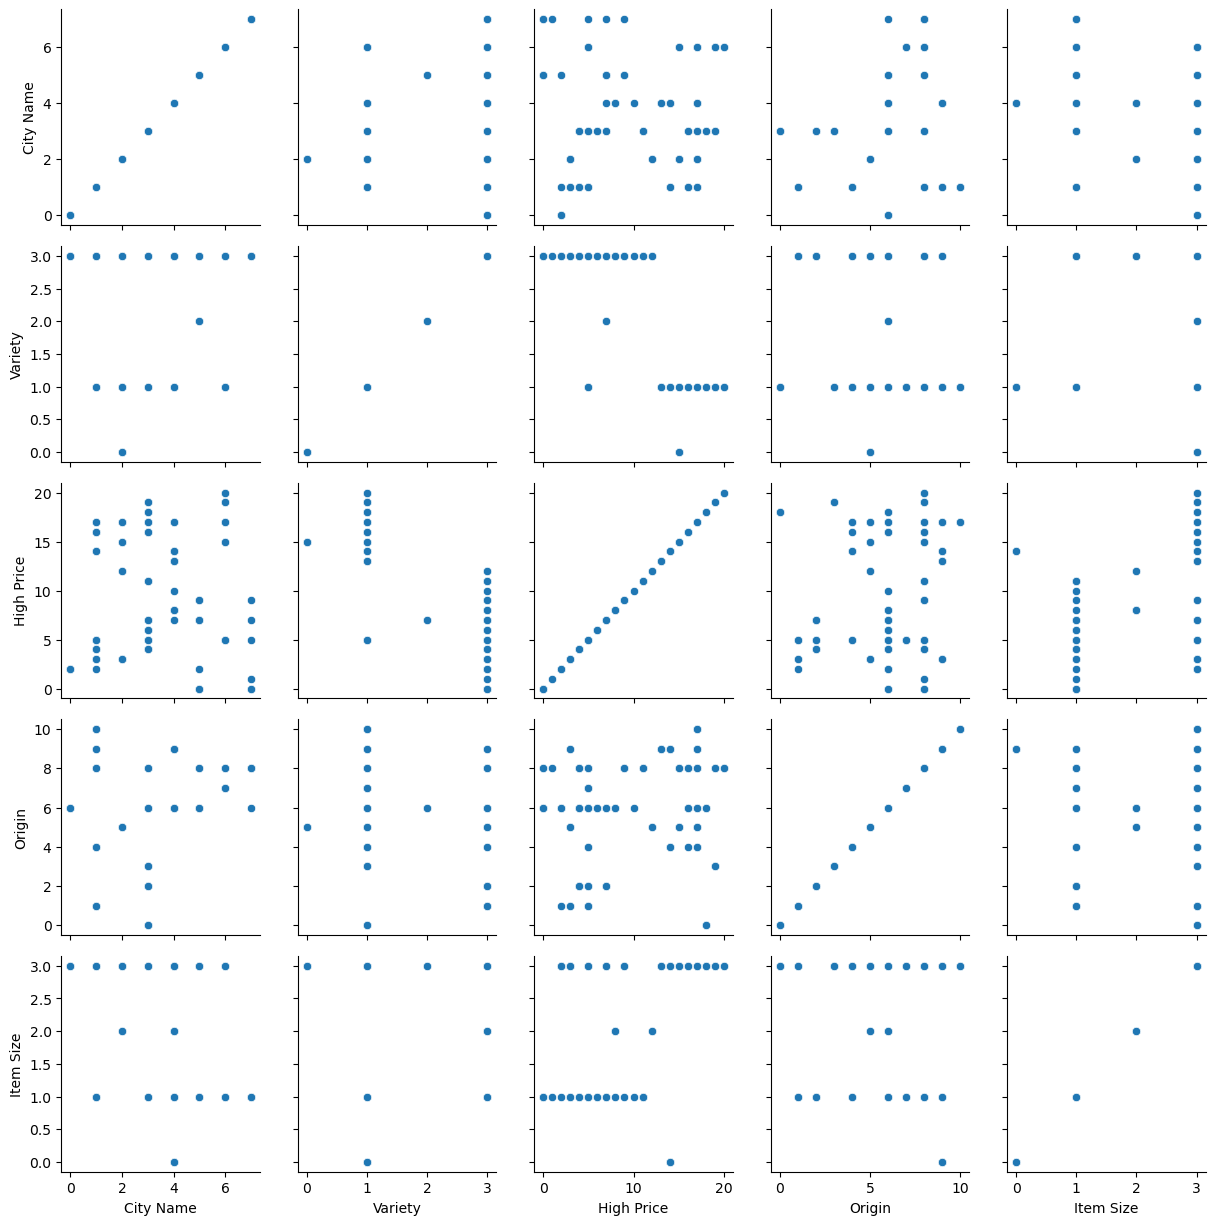

In [279]:
import seaborn as sns

g = sns.PairGrid(new_pumpkins)
g.map(sns.scatterplot)



In [280]:
from sklearn.model_selection import train_test_split

Selected_features = ['High Price','Origin','Item Size','Variety','City Name']


X = new_pumpkins[Selected_features]
y = new_pumpkins['High Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [281]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           3       1.00      0.83      0.91         6
           4       0.67      1.00      0.80         8
           5       0.60      0.50      0.55         6
           7       1.00      1.00      1.00         2
           8       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         1
          16       0.00      0.00      0.00         7
          17       0.62      1.00      0.76        16
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         2

    accuracy                           0.72        61
   macro avg       0.54      0.60      0.56        61
weighted avg       0.59      0.72      0.64        61

Predicted labels:  [17 11

/opt/homebrew/Caskroom/miniforge/base/envs/MLME-22/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniforge/base/envs/MLME-22/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/MLME-22/lib/python3.10/site-packages/sklearn/metrics/_

In [282]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  5,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  8,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  3,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  7,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0]])

In [283]:
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
sns.lineplot([0, 1], [0, 1])
sns.lineplot(fpr, tpr)

ValueError: multiclass format is not supported

# 2.3 

## Digit Classification with Artificial Neural Networks

Part A shows you how to perform a binary classification with Perceptrons using your own framework. Using Scikit-learn on a jupyter notebook, can you train a Multilayer Perceptron on MNIST dataset for 10-digit classification? What are the performance metrics of your model? How could you improve the model performance?

In [284]:
import warnings
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier

# load MNIST data from fetch_openml
X, y = fetch_openml("mnist_784", version=1, return_X_y=True)
X = X/255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [285]:
# set up MLP Classifier
mlp = MLPClassifier(
    hidden_layer_sizes=(50,),
    max_iter=15,
    alpha=1e-4,
    solver="sgd",
    verbose=True,
    random_state=1,
    learning_rate_init=0.1
)

In [286]:
# We probably won't converge so we'll catch the warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

Iteration 1, loss = 0.34662385
Iteration 2, loss = 0.16520897
Iteration 3, loss = 0.12492789
Iteration 4, loss = 0.09951361
Iteration 5, loss = 0.08380122
Iteration 6, loss = 0.07260490
Iteration 7, loss = 0.06340561
Iteration 8, loss = 0.05702569
Iteration 9, loss = 0.04995754
Iteration 10, loss = 0.04527393
Iteration 11, loss = 0.04061896
Iteration 12, loss = 0.03597847
Iteration 13, loss = 0.03328503
Iteration 14, loss = 0.02985077
Iteration 15, loss = 0.02634450
